El dataset que escogi consiste de registros de ausentismo en el trabajo en una empresa de mensajeria en brasil

https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work


La variable objetivo es Absenteeism time in hours, y hay algunas variables que es necesario saber su contexto antes de empezar:


Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
Seasons (summer (1), autumn (2), winter (3), spring (4))
Transportation expense
Distance from Residence to Work (kilometers)
Disciplinary failure (yes=1; no=0)
Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
Son (number of children)
Social drinker (yes=1; no=0)
Social smoker (yes=1; no=0)
Pet (number of pet)

EDA
Preguntas a responder despues de este analisis?

¿QUE DISTRIBUCION TIENE EL DATASET?
¿QUE PODEMOS ASUMIR DEL DATASET?
¿EXISTEN RELACIONES ENTRE LAS VARIABLES DE NUESTRO DATASET?
¿COMO ESTAMOS SEGUROS DE QUE ESTA LISTO PARA METERLO A UN ALGORITMO DE ML?
¿COMO ESCOGER EL MEJOR MODELO PARA ESTE DATASET?

Para esto se aplicara los 4 tipos de EDA:
Univariado (no grafico y grafico)
multivariado (no grafico y grafico)

IMPORTAR LIBRERIAS

In [ ]:
import warnings
warnings.simplefilter(action = "ignore",
                      category = FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

import matplotlib.pyplot as plt
import scipy.stats as st

IMPORTAR LIBRERIA

In [ ]:
data = "/content/Absenteeism_at_work.csv"
df = pd.read_csv(data, sep = ";")

Chequeo general del dataset

In [ ]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [ ]:
##dimension del dataset
print(df.shape)

(740, 21)


In [ ]:
##todas las columnas del dataset
print(df.columns)

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


In [ ]:
##info general de todos los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

INTERPRETACION
De momento se puede ver que no hay nulos en el dataset (falta confirmar).

Los Dtypes de varias columnas como "Mes de ausencia", "Gastos de transporte", "Distancia de la residencia al trabajo", "Alcanzar el objetivo", "Educación", "Peso", "Altura", "Índice de masa corporal" y "Tiempo de ausencia en horas" deben ser reales o flotantes. Pero, la celda anterior muestra que tienen tipos de datos enteros. Por lo tanto, necesitamos convertir sus tipos de datos en float.

In [ ]:
df[["Month of absence","Transportation expense",
    "Distance from Residence to Work", "Hit target",
    "Education","Weight","Height","Body mass index",
    "Absenteeism time in hours"]]=df[["Month of absence","Transportation expense",
                                      "Distance from Residence to Work",
                                      "Hit target","Education","Weight","Height",
                                      "Body mass index","Absenteeism time in hours"]].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [ ]:
##columnas redundantes
df.drop(["ID", "Pet"], axis = 1 , inplace = True)

In [ ]:
##resumen estadistico de los atributos
print(df.describe())

       Reason for absence  Month of absence  Day of the week     Seasons  \
count          740.000000        740.000000       740.000000  740.000000   
mean            19.216216          6.324324         3.914865    2.544595   
std              8.433406          3.436287         1.421675    1.111831   
min              0.000000          0.000000         2.000000    1.000000   
25%             13.000000          3.000000         3.000000    2.000000   
50%             23.000000          6.000000         4.000000    3.000000   
75%             26.000000          9.000000         5.000000    4.000000   
max             28.000000         12.000000         6.000000    4.000000   

       Transportation expense  Distance from Residence to Work  Service time  \
count              740.000000                       740.000000    740.000000   
mean               221.329730                        29.631081     12.554054   
std                 66.952223                        14.836788      4.38487

Interpretacion
Se puede ver que el valor minimo del atributo de mes de ausencia es cero, ya que ese atributo va del 1 al 12

In [ ]:
df["Month of absence"].replace(0,1,inplace=True)
print(df.describe())

       Reason for absence  Month of absence  Day of the week     Seasons  \
count          740.000000        740.000000       740.000000  740.000000   
mean            19.216216          6.328378         3.914865    2.544595   
std              8.433406          3.429397         1.421675    1.111831   
min              0.000000          1.000000         2.000000    1.000000   
25%             13.000000          3.000000         3.000000    2.000000   
50%             23.000000          6.000000         4.000000    3.000000   
75%             26.000000          9.000000         5.000000    4.000000   
max             28.000000         12.000000         6.000000    4.000000   

       Transportation expense  Distance from Residence to Work  Service time  \
count              740.000000                       740.000000    740.000000   
mean               221.329730                        29.631081     12.554054   
std                 66.952223                        14.836788      4.38487

ANALISIS UNIVARIADO de la variable objetivo

In [ ]:
print(df["Absenteeism time in hours"].describe())

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64


INTERPRETACION:
El promedio de horas de ausensia en trabajo esta en 6 horas y con una mediana de 3 hrs

El percentil 50 denota la mediana de la distribución (eso comprueba que la mediana si es de tres horas).


In [ ]:
##asimetria (skewness)
print(df["Absenteeism time in hours"].skew())


5.720727863123873


interpretacion
La asimetria de la distribucion de nuestra variable objetivo, podemos concluir que la variable objetivo está muy sesgada positivamente ya que la asimetria es mucho mayor a 1

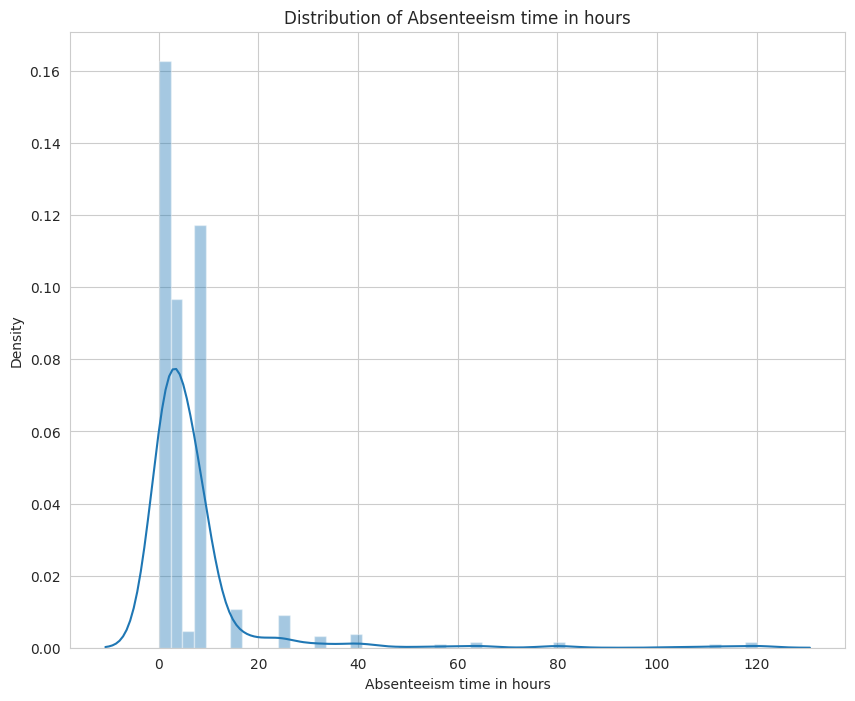

In [ ]:
plt.figure(figsize= (10,8))
sns.distplot(df["Absenteeism time in hours"])
plt.title("Distribution of Absenteeism time in hours")
plt.show()

In [ ]:
##kurtosis
print(df['Absenteeism time in hours'].kurt())

38.77730707753998


La variable objetivo en este caso tiene una kurtosis demasiado alta, eso quiere decir que tiene muchos outliers o una cola muy pesada en su distribucion. Entonces si se desea modelar algo, se deberia analizar si esa cola es ruido o info valiosa

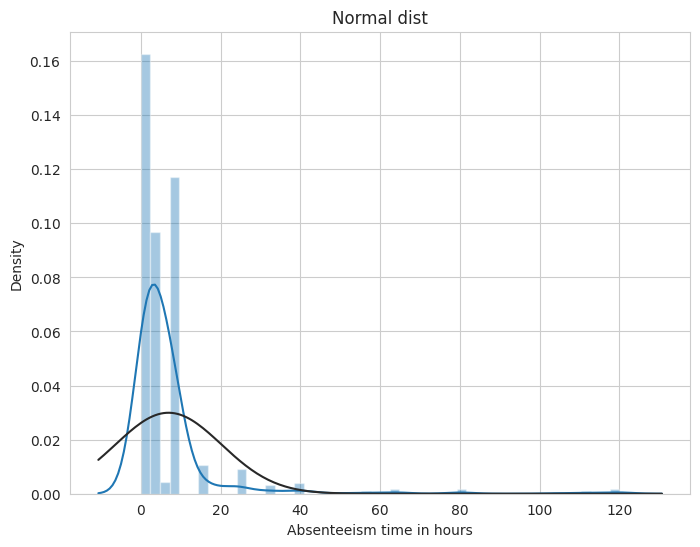

In [ ]:
##distribucion de la variable objetivo
y = df["Absenteeism time in hours"]
plt.figure(figsize=(8,6))
sns.distplot(y, kde= True, fit=st.norm)
plt.title("Normal dist")
plt.show()

Se puede ver como los valores no se acomodan con la distribucion normal como se deberia, cambiare de distribucion

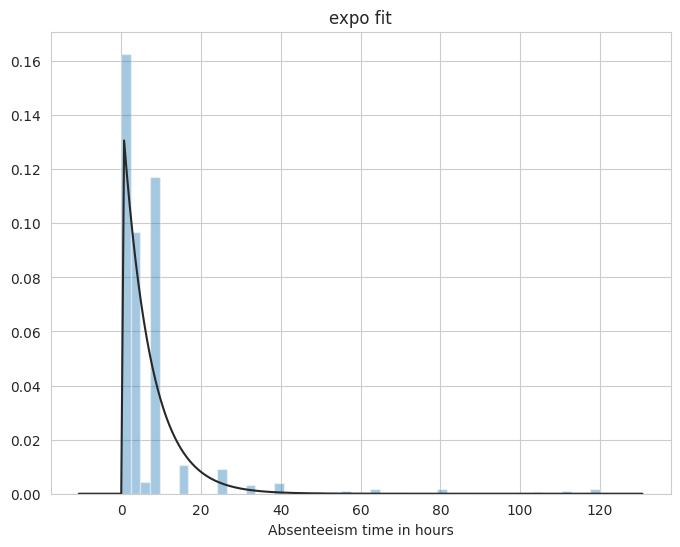

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(y, kde=False, fit=st.expon)
plt.title("expo fit")
plt.show()

se le puede dar una interpretacion de que se comporta como si la mayoría son faltas cortas, con pocos casos de faltas largas.

Este ajuste exponencial se podria decir que valida nuestra anterior alta kurtosis, colas mas pesadas que una normal, pero coherentes con este tipo de distribucion)

ANALISIS MULTIVARIADO
Revisare la relacion entre la variable objetivo con las variables categoricas

In [ ]:
df["Seasons"].value_counts()

,count
Seasons,
4,195
2,192
3,183
1,170


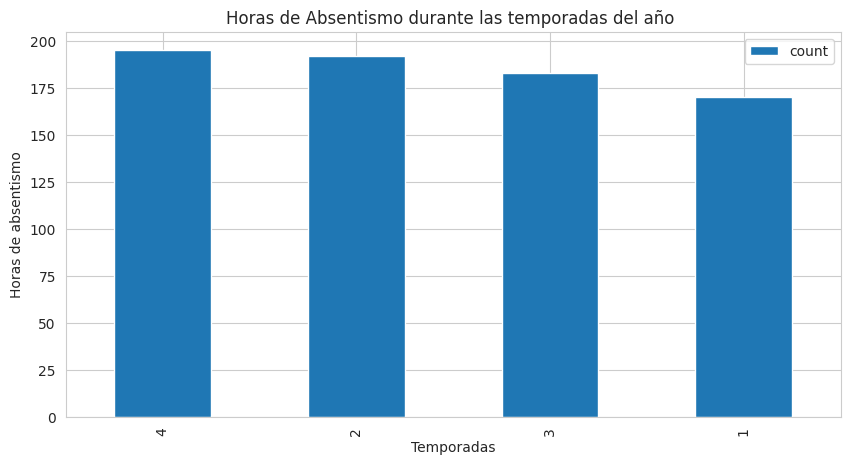

In [ ]:
df["Seasons"].value_counts().plot(kind="bar", figsize=(10, 5))
plt.title("Horas de Absentismo durante las temporadas del año ")
plt.xlabel("Temporadas")
plt.ylabel("Horas de absentismo")
plt.legend()
plt.show()

Cada numero representa una temporada del año, no se en que se basaron para numerarlas pero el otoño es el que es representado por la clase 4, podemos ver que esa es la etapa del año que tiene mas absentismo de trabajo

In [ ]:
df["Education"].value_counts()

,count
Education,
1.0,611
3.0,79
2.0,46
4.0,4


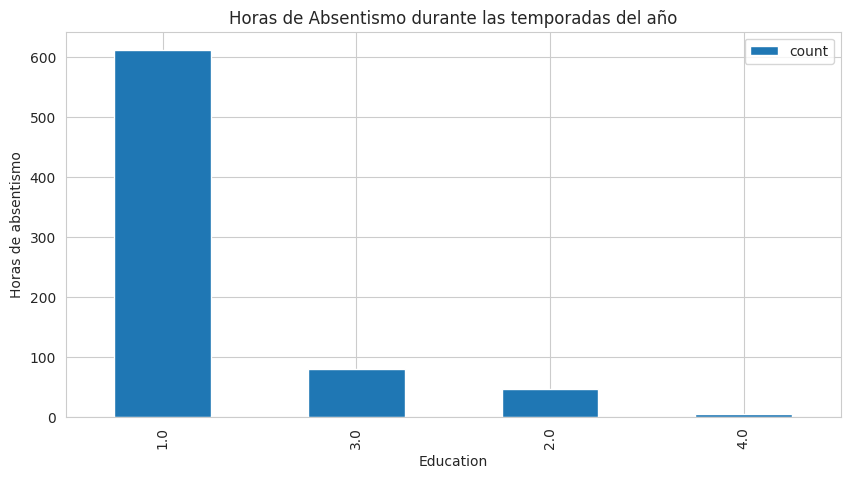

In [ ]:
df["Education"].value_counts().plot(kind = 'bar', figsize=(10,5))
plt.title("Horas de Absentismo durante las temporadas del año")
plt.xlabel("Education")
plt.ylabel("Horas de absentismo")
plt.legend()
plt.show()

En esta clase el numero 1 es representado como la highschool, es la que presenta mayores faltas. Mientras que la clase que representa los doctorados y maestrias son las que tienen menos faltas

In [ ]:
df['Social drinker'].value_counts()

,count
Social drinker,
1,420
0,320


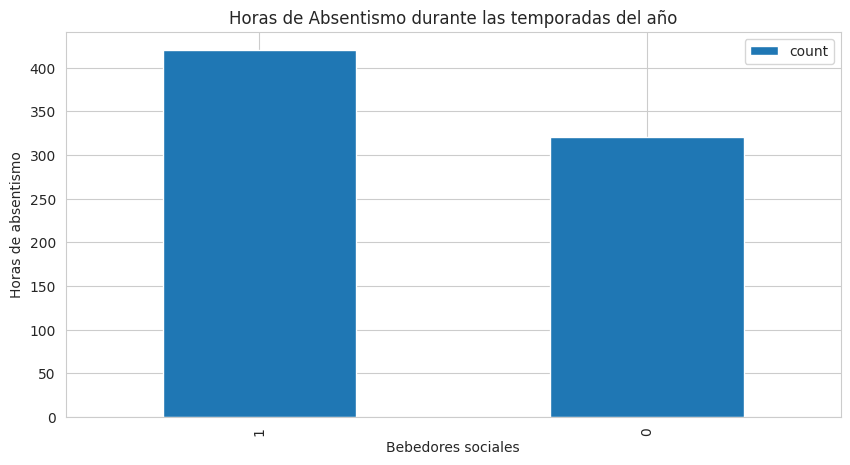

In [ ]:
df["Social drinker"].value_counts().plot(kind="bar", figsize= [10,5])
plt.title('Horas de Absentismo durante las temporadas del año')
plt.xlabel('Bebedores sociales')
plt.ylabel('Horas de absentismo')
plt.legend()
plt.show()

Esta clase es binaria (si=1, no=0). La grafica no da a entender que los bebedores sociales tienen la mayoria de horas faltadas al trabajo

In [ ]:
df["Social smoker"].value_counts()

,count
Social smoker,
0,686
1,54


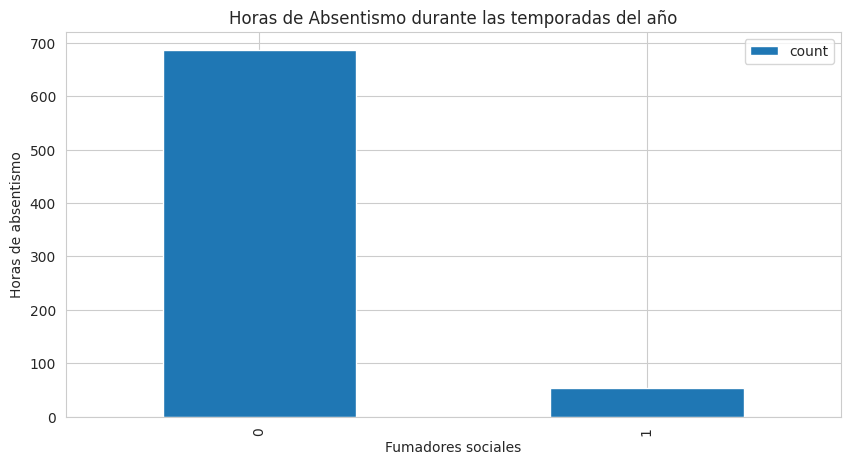

In [ ]:
df["Social smoker"].value_counts().plot(kind = "bar", figsize=(10,5))
plt.title("Horas de Absentismo durante las temporadas del año")
plt.xlabel("Fumadores sociales")
plt.ylabel("Horas de absentismo")
plt.legend()
plt.show()

Misma clasificacion binaria. El grafico concluye que los fumadores sociales tienen menos casos de absentismo

ANALISIS MULTIVARIADO

In [ ]:
##correlacion
correlation = df.corr()

In [ ]:
correlation["Absenteeism time in hours"].sort_values(ascending= False)

,Absenteeism time in hours
Absenteeism time in hours,1.000000
Height,0.144420
Son,0.113756
Age,0.065760
Social drinker,0.065067
Transportation expense,0.027585
Hit target,0.026695
Work load Average/day,0.024749
Month of absence,0.023779
Service time,0.019029


Interpretacion:
Teniendo en cuenta que el rango de la correlacion va de -1 a 1....

Cuando es mas cerca a 0 es que no hay correlacion, entonces nos acabamos de dar cuenta que no hay relacion entre las temporadas del año y la absensia del trabajo

Busqueda de patrones y relaciones

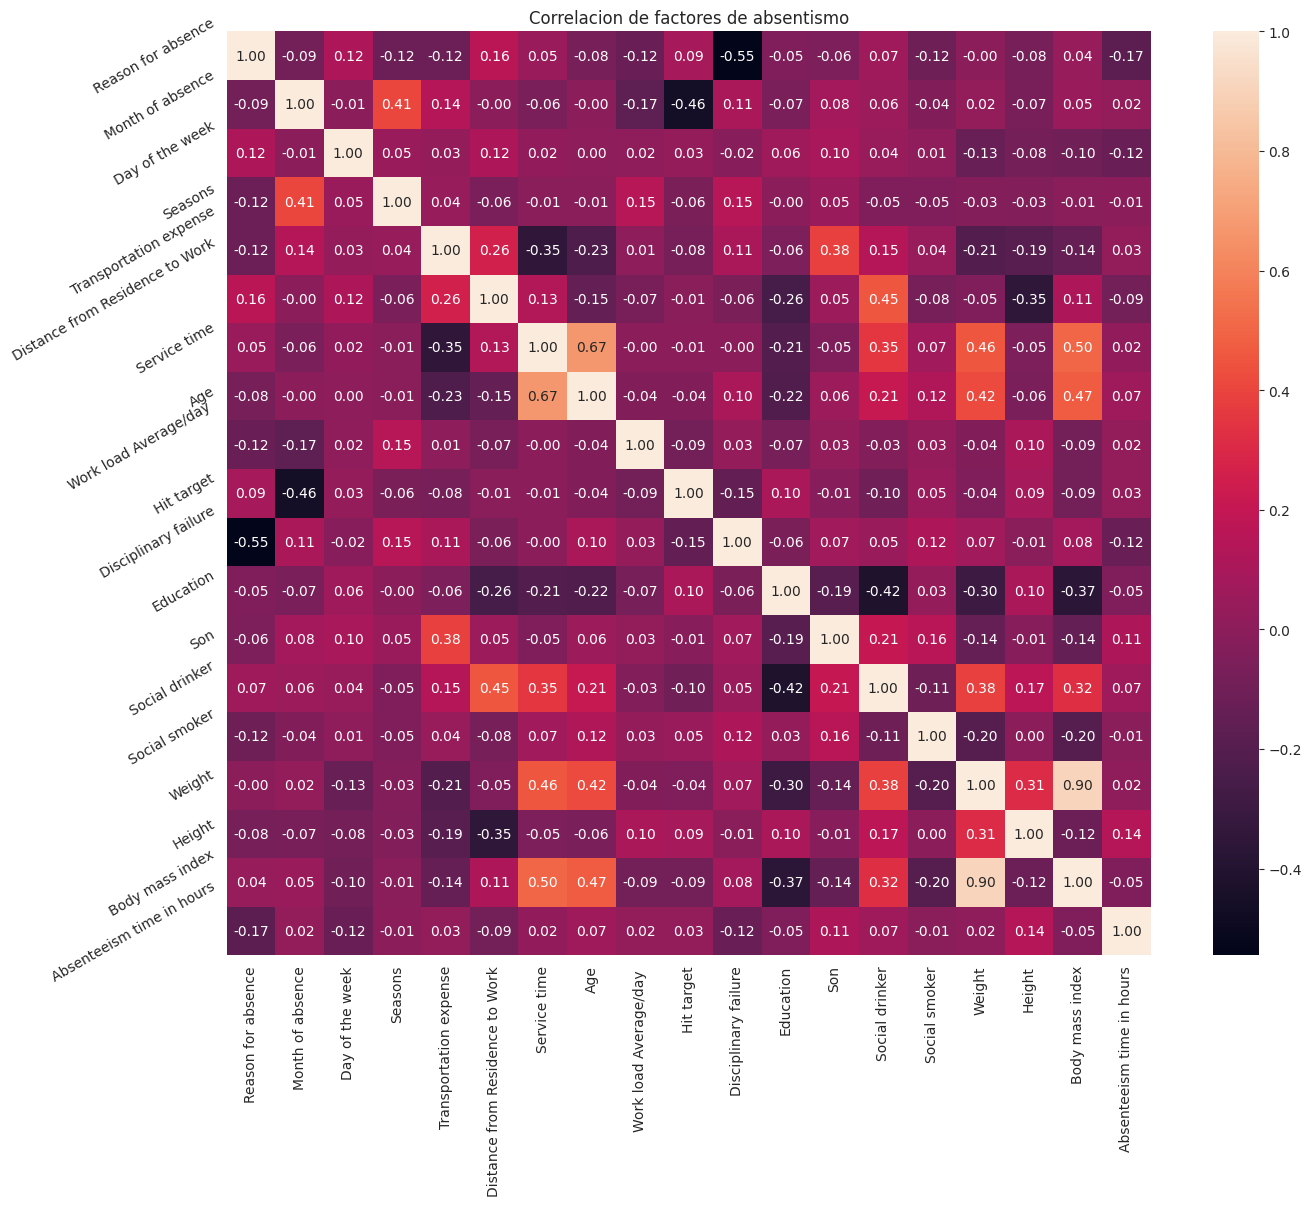

In [ ]:
##correlation heat map

plt.figure(figsize=(16,12))
plt.title("Correlacion de factores de absentismo")
a = sns.heatmap(correlation, square= True, annot=True, fmt=".2f", linecolor="white")
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Interpretacion
Hay cosas obvias como que el mes de absentismo esta correlacionado positivamente con las temporadas del año, como que el porcentaje de masa muscular con el peso y la edad estan correlacionadas positivamente, algo que se me hizo mas interesante fue que el porcentaje de masa muscular esta positivamente correlacionado con el tiempo de servicio

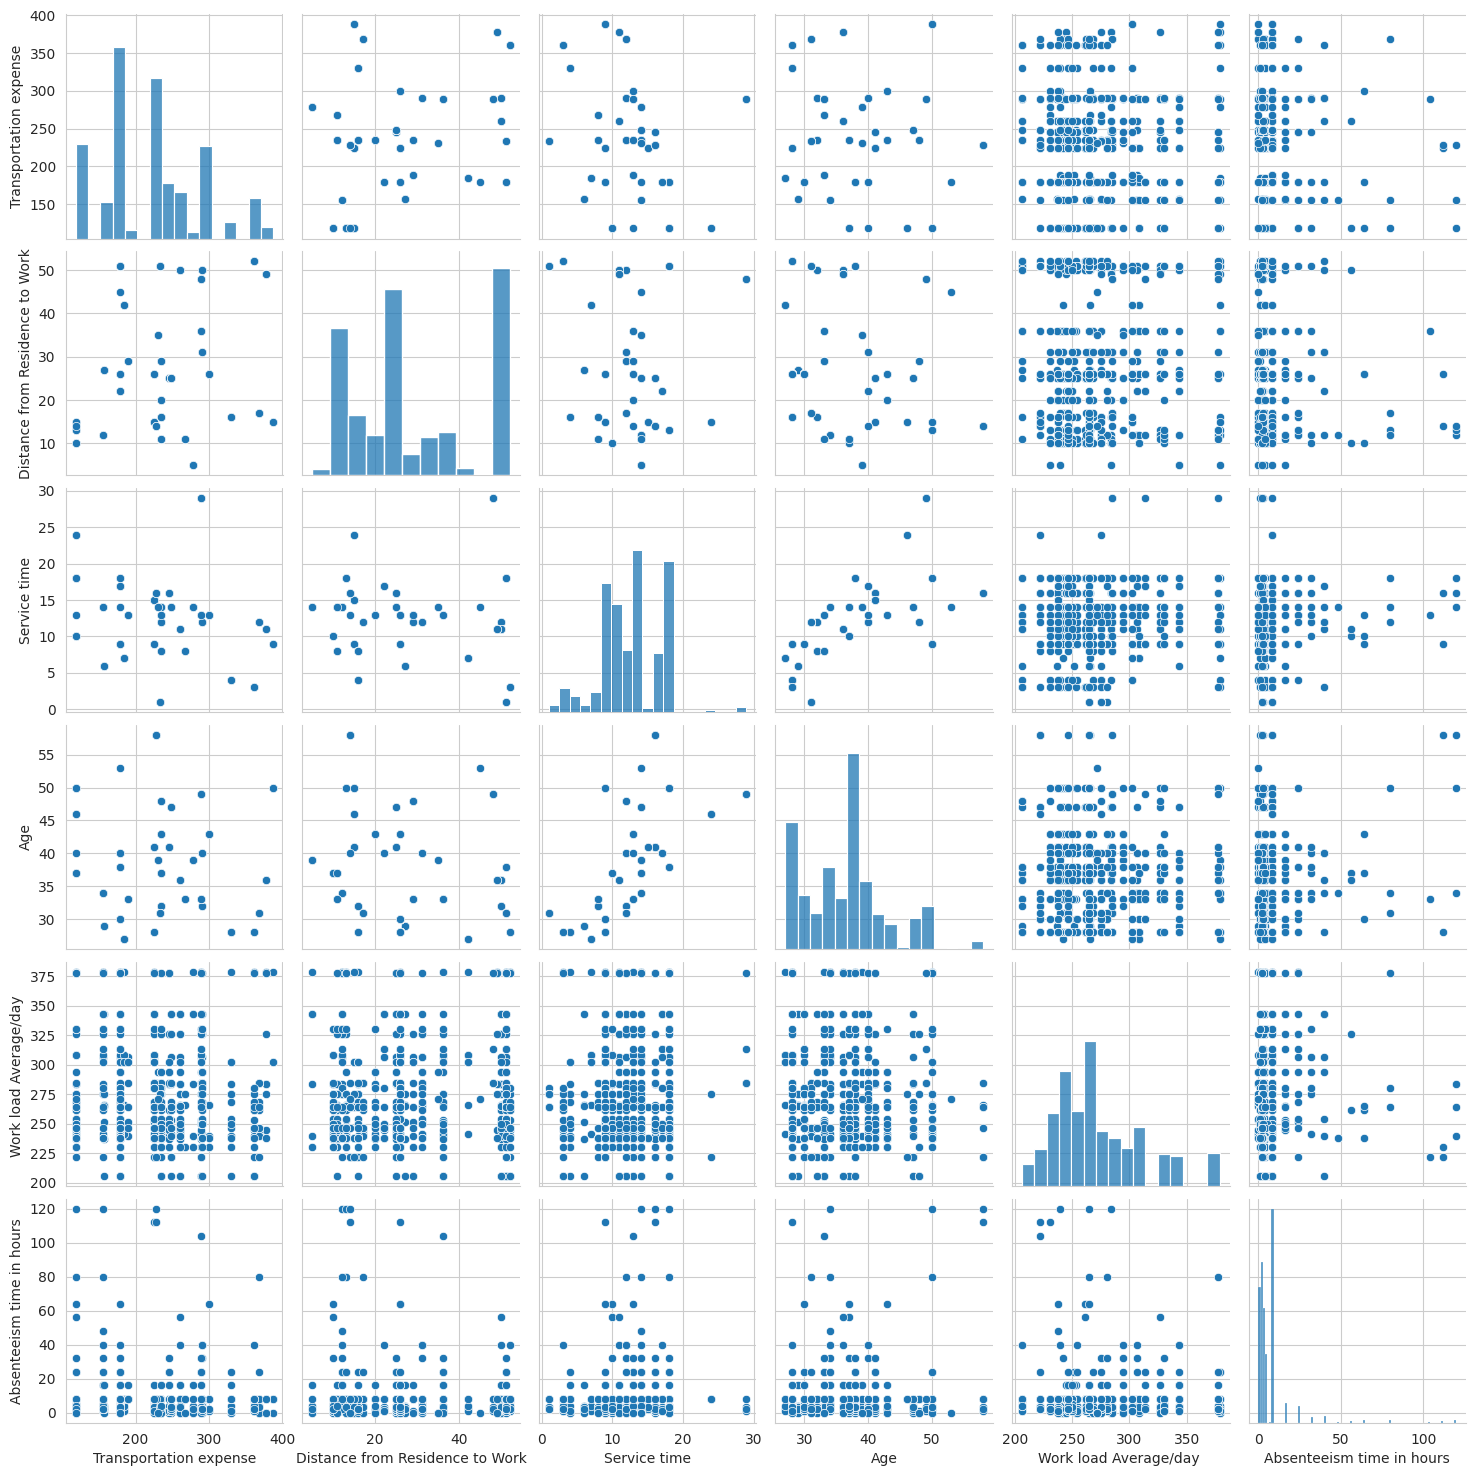

In [ ]:
##pairplt
num_var = ["Transportation expense", "Distance from Residence to Work",
          "Service time", "Age", "Work load Average/day ",
           "Absenteeism time in hours"]
sns.pairplot(data=df[num_var], kind="scatter", diag_kind="hist")
plt.show()

El pair plot confirma la alta correlacion entre el tiempo de servicio con la edad, tambien como la distancia casa/trabajo con el coste de transporte esta altamente relacionado

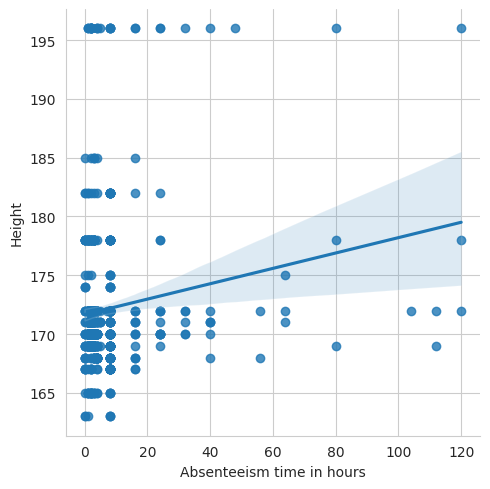

In [ ]:
##scatterplt de absentismo por edad

sns.lmplot(x= "Absenteeism time in hours", y = "Height", data = df)
plt.show()

Se puede ver que esta medianamente positiva la relacion entre estos atributos


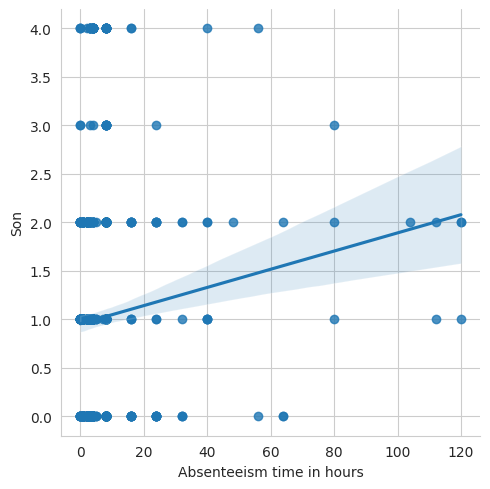

In [ ]:
##scaterplt de absentismo por cantidad de hijos
sns.lmplot(x='Absenteeism time in hours', y='Son', data=df)
plt.show()

Se puede ver que este scatterplot muestra la baja correlacion entre la cantidad de hijos con el absentismo en el trabajo

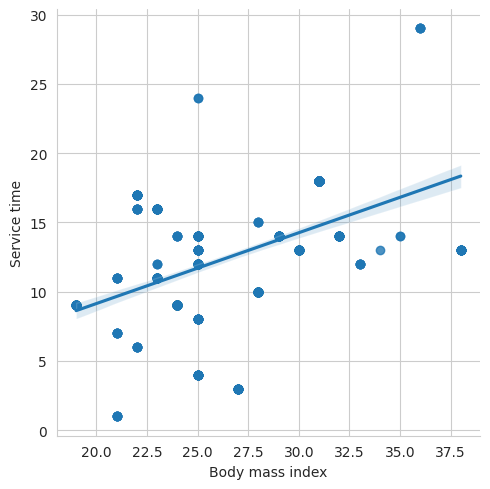

In [ ]:
##scaterplt de masa muscular con el tiempo de servicio
sns.lmplot(x='Body mass index', y='Service time', data=df)
plt.show()

Estas dos factores muestran tener una fuerte correlacion , casi , La mitad de los valores de los datos se encuentran por debajo de la línea de regresión ajustada y la mitad de los valores se encuentran por encima de ella.

BOX PLOT

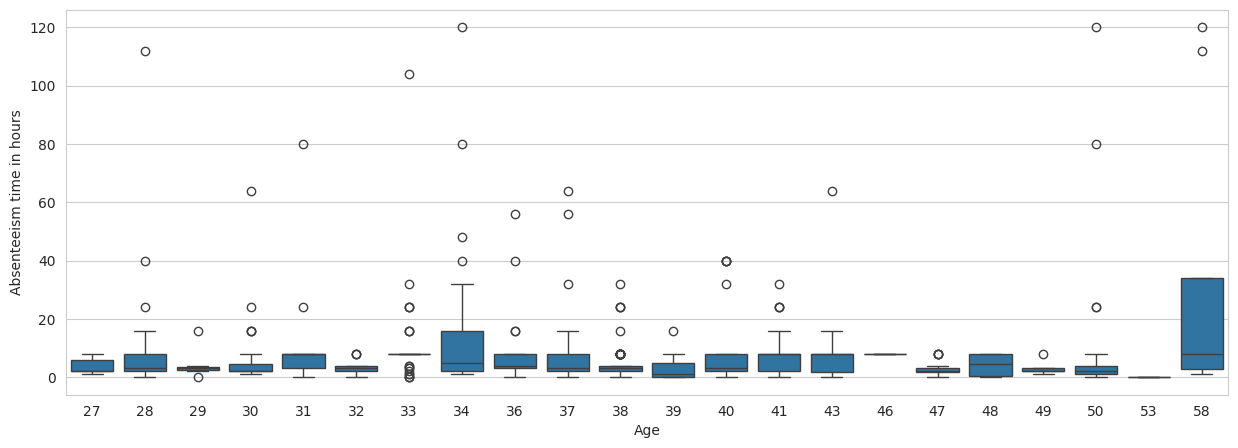

In [ ]:
plt.rcParams["figure.figsize"]=(15,5)
ax = sns.boxplot(x="Age", y="Absenteeism time in hours", data=df)


El boxplot confirma que las personas de 34 o 58 años tienen el mayor número de tiempo de absentismo en horas.

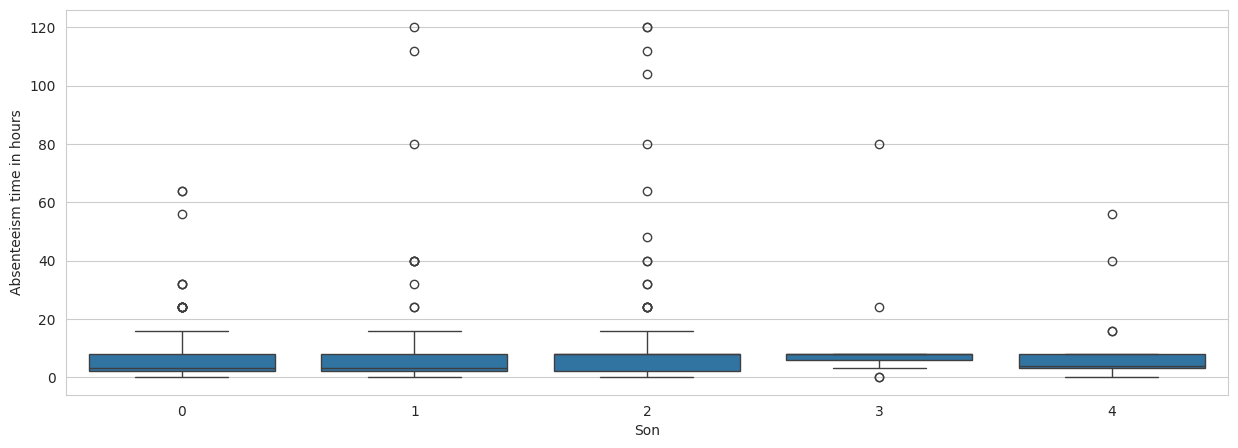

In [ ]:
plt.rcParams["figure.figsize"]=(15,5)
ax = sns.boxplot(x="Son", y="Absenteeism time in hours", data=df)

De este boxplot sacamos que los que tienen dos hijos son los que muestran mas absentismo en el trabajo

CONCLUSIONES....


Despues de todo este analisis, para aplicar un modelo usaria una regresion lineal o arboles de decisiones como un baseline

Y para antes aplicar un modelo, yo pienso que faltaria terminar de revisar los outliers en el target y variables numericas, tambien propondria crear una variable binaria (absent=0, si y solo si horas=0, 1 si > 0) para realizarlo como una clasificacion binaria.